In [85]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import TwoSlopeNorm  # Use CenteredNorm for newer matplotlib versions
from matplotlib.cm import ScalarMappable
import matplotlib.colors

In [86]:
pop_df=pd.read_csv(r'C:\Users\Yasaman\Downloads\World_bank_population.csv',skiprows=3)
pop_df=pop_df[['Country Code','2003','2018']].dropna()
pop_df['2018']=pop_df['2018'].astype(int)
possible_countries=pop_df.query(" `2018` >=1000000")['Country Code'].values
possible_countries=[x.lower() for x in possible_countries]

In [92]:
df = pd.read_csv(r"C:\Users\Yasaman\Downloads\Attention-fractional counting.csv")
# Rename columns in a single step
df.rename(
    columns={
        'year': 'Year',
        'aggregated_value': 'count',
        'country': 'Mention_country',
        'affiliation_country': 'Aff_country'
    },
    inplace=True
)

# Define dictionary for countries and get lowercase abbreviations
Country_list = {
    'Egypt': 'EGY', 'Tunisia': 'TUN', 'Libya': 'LBY', 'Syria': 'SYR', 'Yemen': 'YEM',
    'Bahrain': 'BHR', 'Jordan': 'JOR', 'Kuwait': 'KWT', 'Morocco': 'MAR', 'Oman': 'OMN'
}
abbr = [code.lower() for code in Country_list.values()]


# Exclude certain subject areas
physical_sciences = ['MATH', 'ENGI', 'PHYS', 'COMP', 'MUL']
df = df[~df['subjarea'].isin(physical_sciences)]
df=df[df['Year'].isin(np.arange(2003, 2019,1))]


In [110]:
target_df=df[(df['Year'].isin(np.arange(2003, 2019, 1)))&(df['Aff_country']=='geo') &(df['Mention_country'].isin(abbr))].groupby('Year')['count'].sum().reset_index()
# Filling missing years with zero
all_years = pd.DataFrame({"Year": range(2003, 2019)})
filled_df = pd.merge(all_years, target_df, on="Year", how="left").fillna(0)

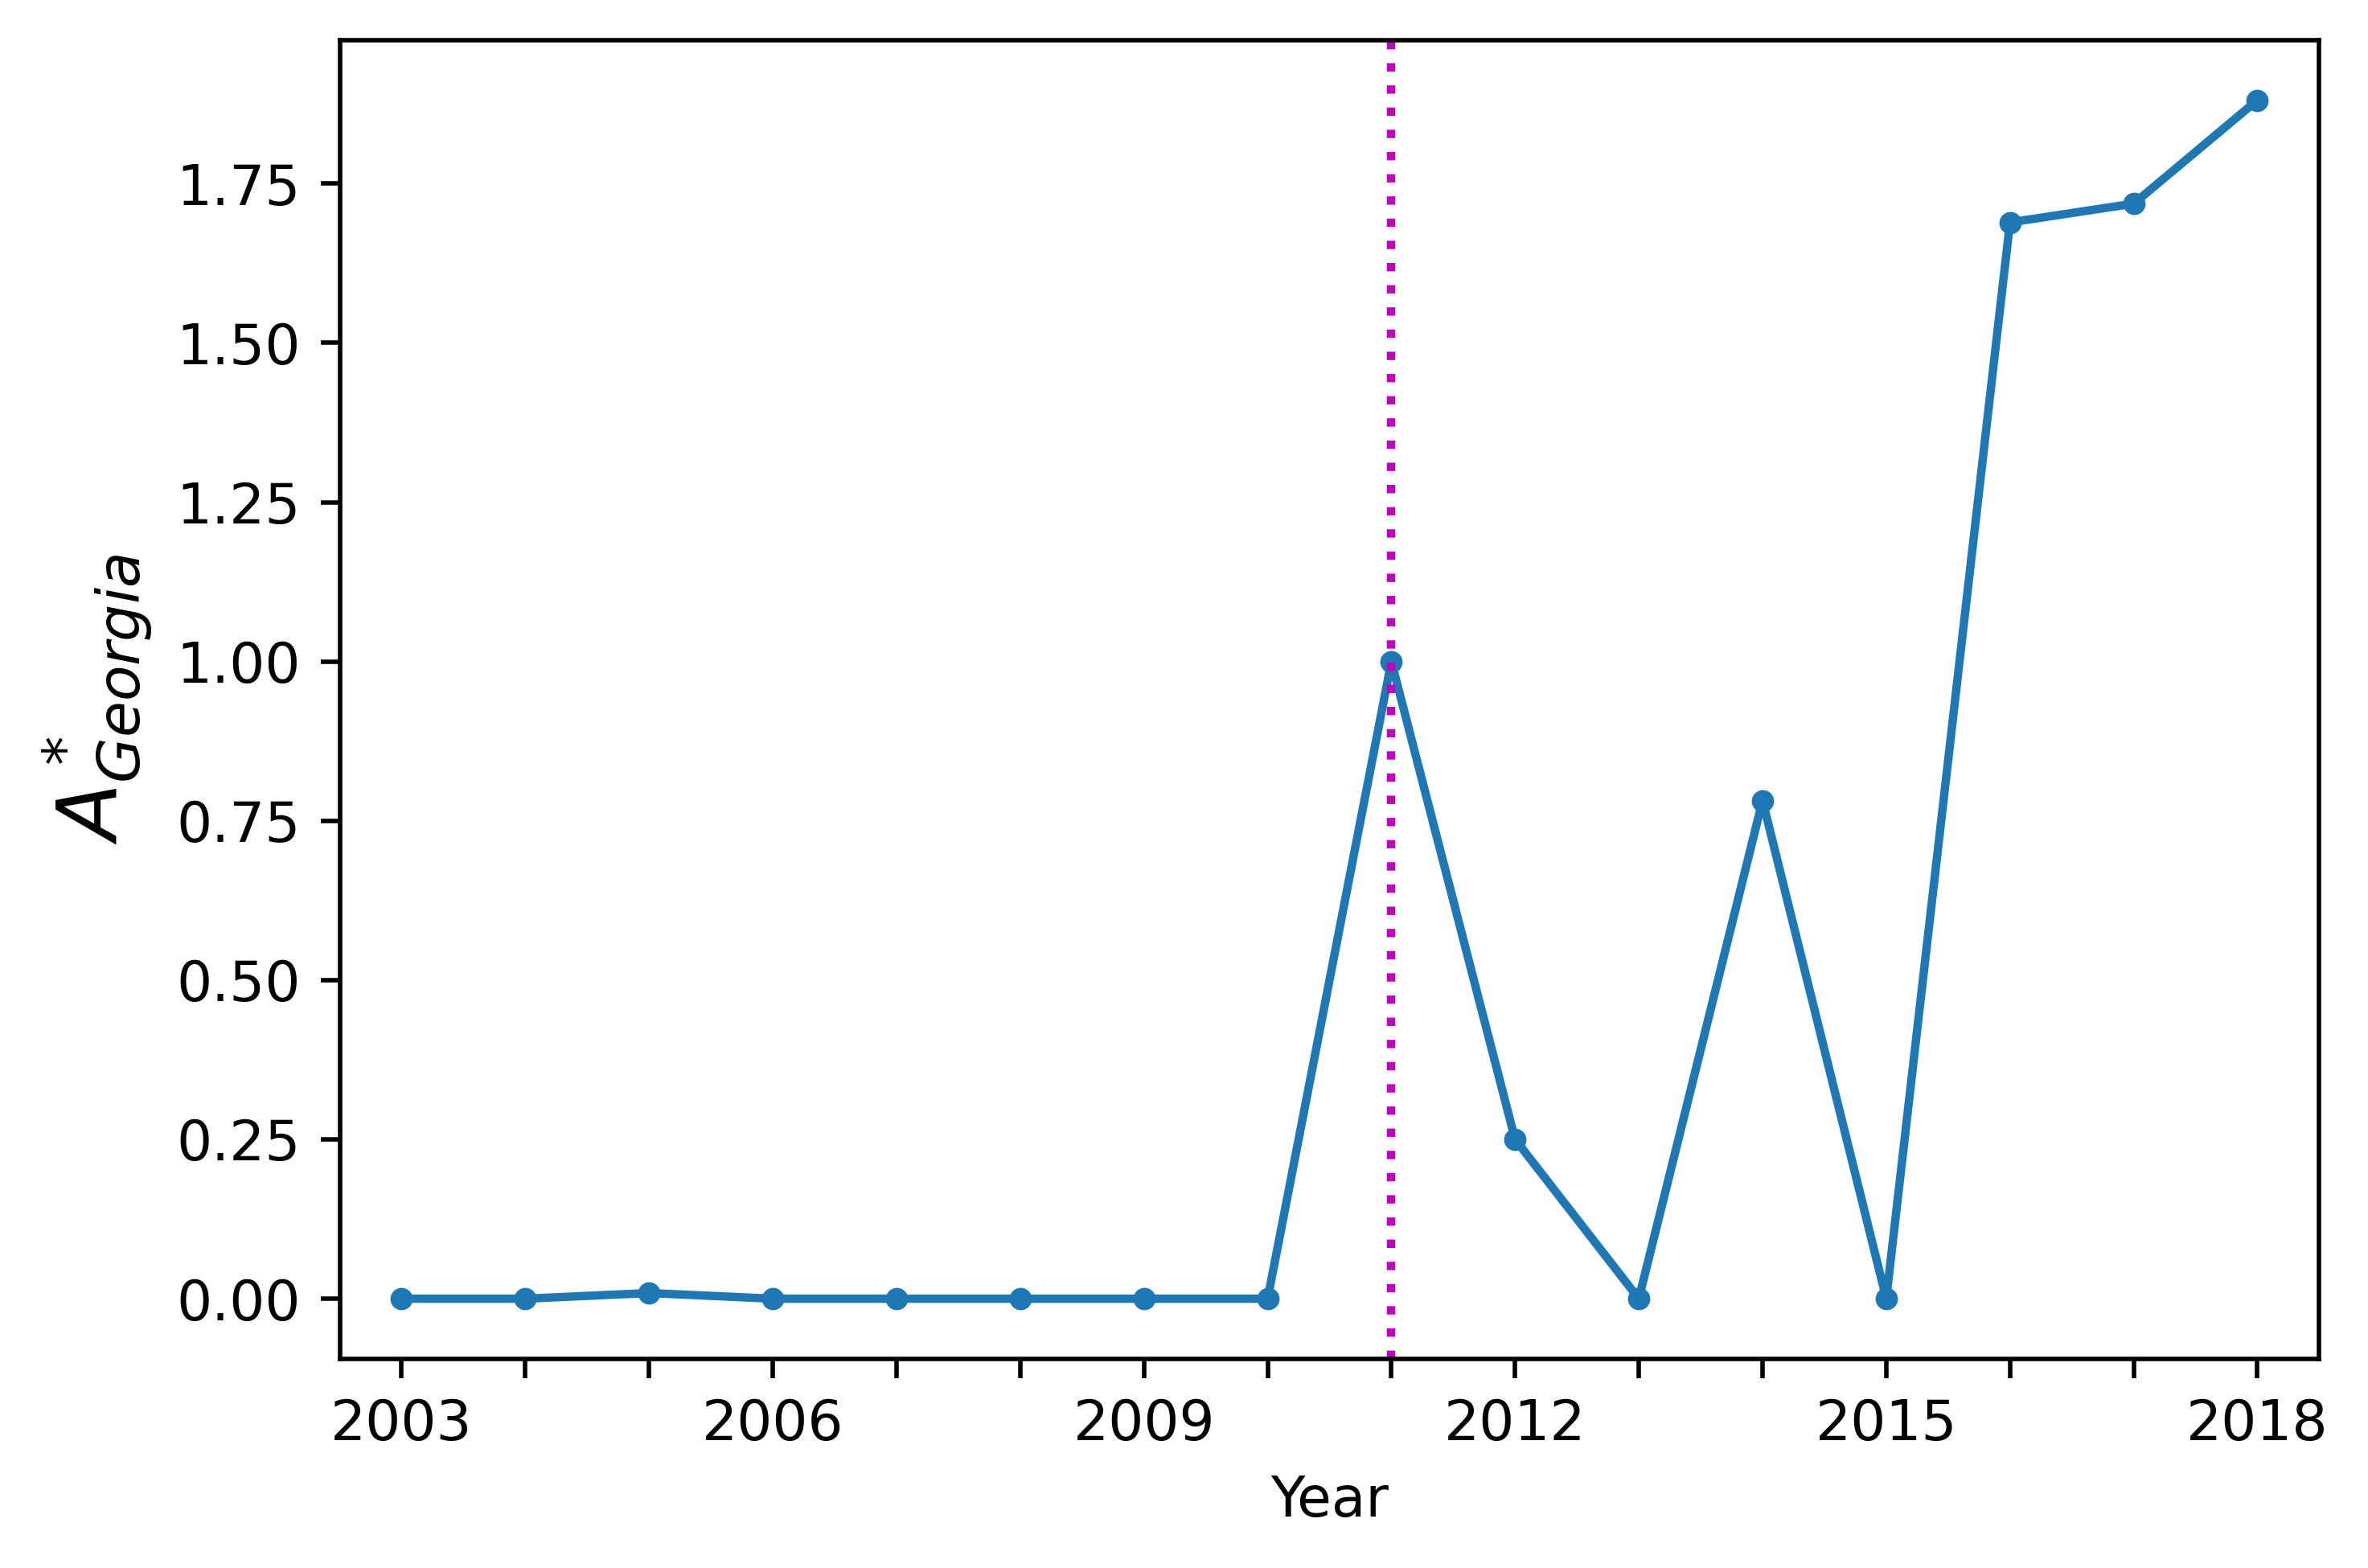

In [113]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(6,4), dpi=500)
ax.plot(filled_df['Year'], filled_df['count'], marker='.')
ax.axvline(2011, color='m', linestyle=':')
ax.set_xticks(range(2003, 2019))
ax.set_xticklabels([str(tick) if year % 3 == 0 else '' for year, tick in enumerate(range(2003, 2019))])
ax.set_xlabel('Year')
ax.set_xlim(2002.5, 2018.5)
ax.set_ylabel('$A^*_{Georgia}$',fontsize=15)
fig.tight_layout()
fig.savefig('Supp_Figure1.pdf')